Import all needed packages and dataset "BC"

In [ ]:
#import packages for all models
%matplotlib inline
import os
import sys
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import sklearn
import time
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

#import packages for decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

#improt packages for neural networks
import keras
import tensorflow as tf
from sklearn import model_selection

from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

#improt packages for boosting
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

#improt packages for svm
from scipy import stats
import cvxopt
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

#improt packages for KNN
from sklearn.neighbors import KNeighborsClassifier

#import data 2
BC = pd.read_csv("/content/BC.csv")
print(BC)
#data cleaning for data 2 already done in csv file

#drop NA
BC = BC.dropna(axis=0)

# transform data to numeric to enable further analysis
BC.dtypes

     age  menopause  overweight  race  tumor-size  inv-nodes  node-caps  \
0      2          2           0     5           2          0          2   
1      3          0           1     2           2          0          1   
2      3          0           1     5           6          0          1   
3      2          2           0     2           6          0          2   
4      2          2           0     2           5          4          2   
..   ...        ...         ...   ...         ...        ...        ...   
281    3          0           0     5           5          5          2   
282    3          2           1     2           4          4          2   
283    1          2           0     2           5          5          2   
284    3          2           1     1           2          0          1   
285    3          0           1     3           7          0          1   

     deg-malig  breast  breast-quad  irradiat  death  
0            3       1            3         

age            int64
menopause      int64
overweight     int64
race           int64
tumor-size     int64
inv-nodes      int64
node-caps      int64
deg-malig      int64
breast         int64
breast-quad    int64
irradiat       int64
death          int64
dtype: object

Decision Tree Analysis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


(286, 11)
(286,)
(228, 11)
(58, 11)


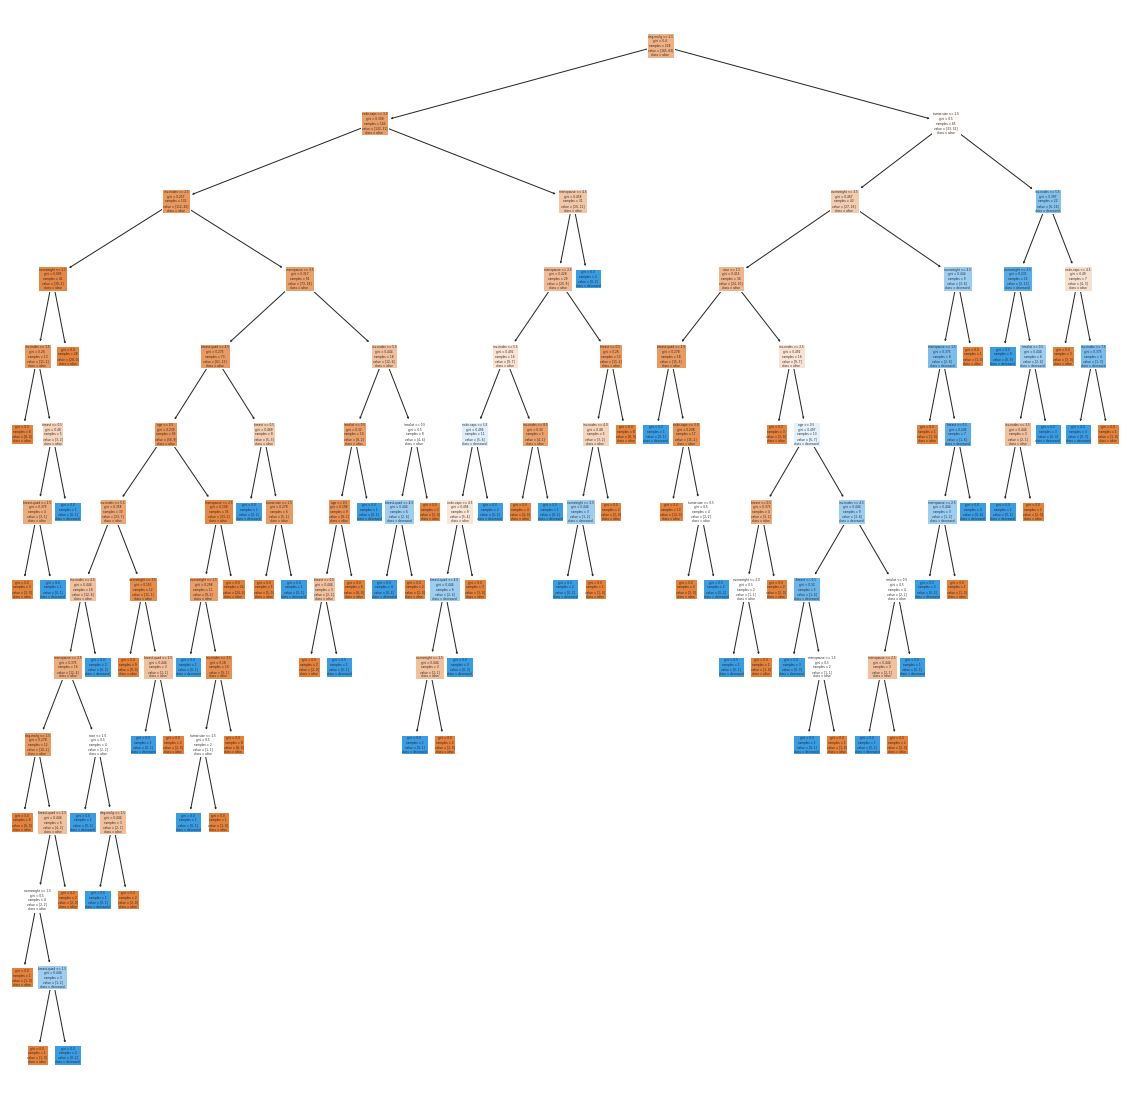

Train score 1.0
Test score 0.6551724137931034
Train Confusion matrix


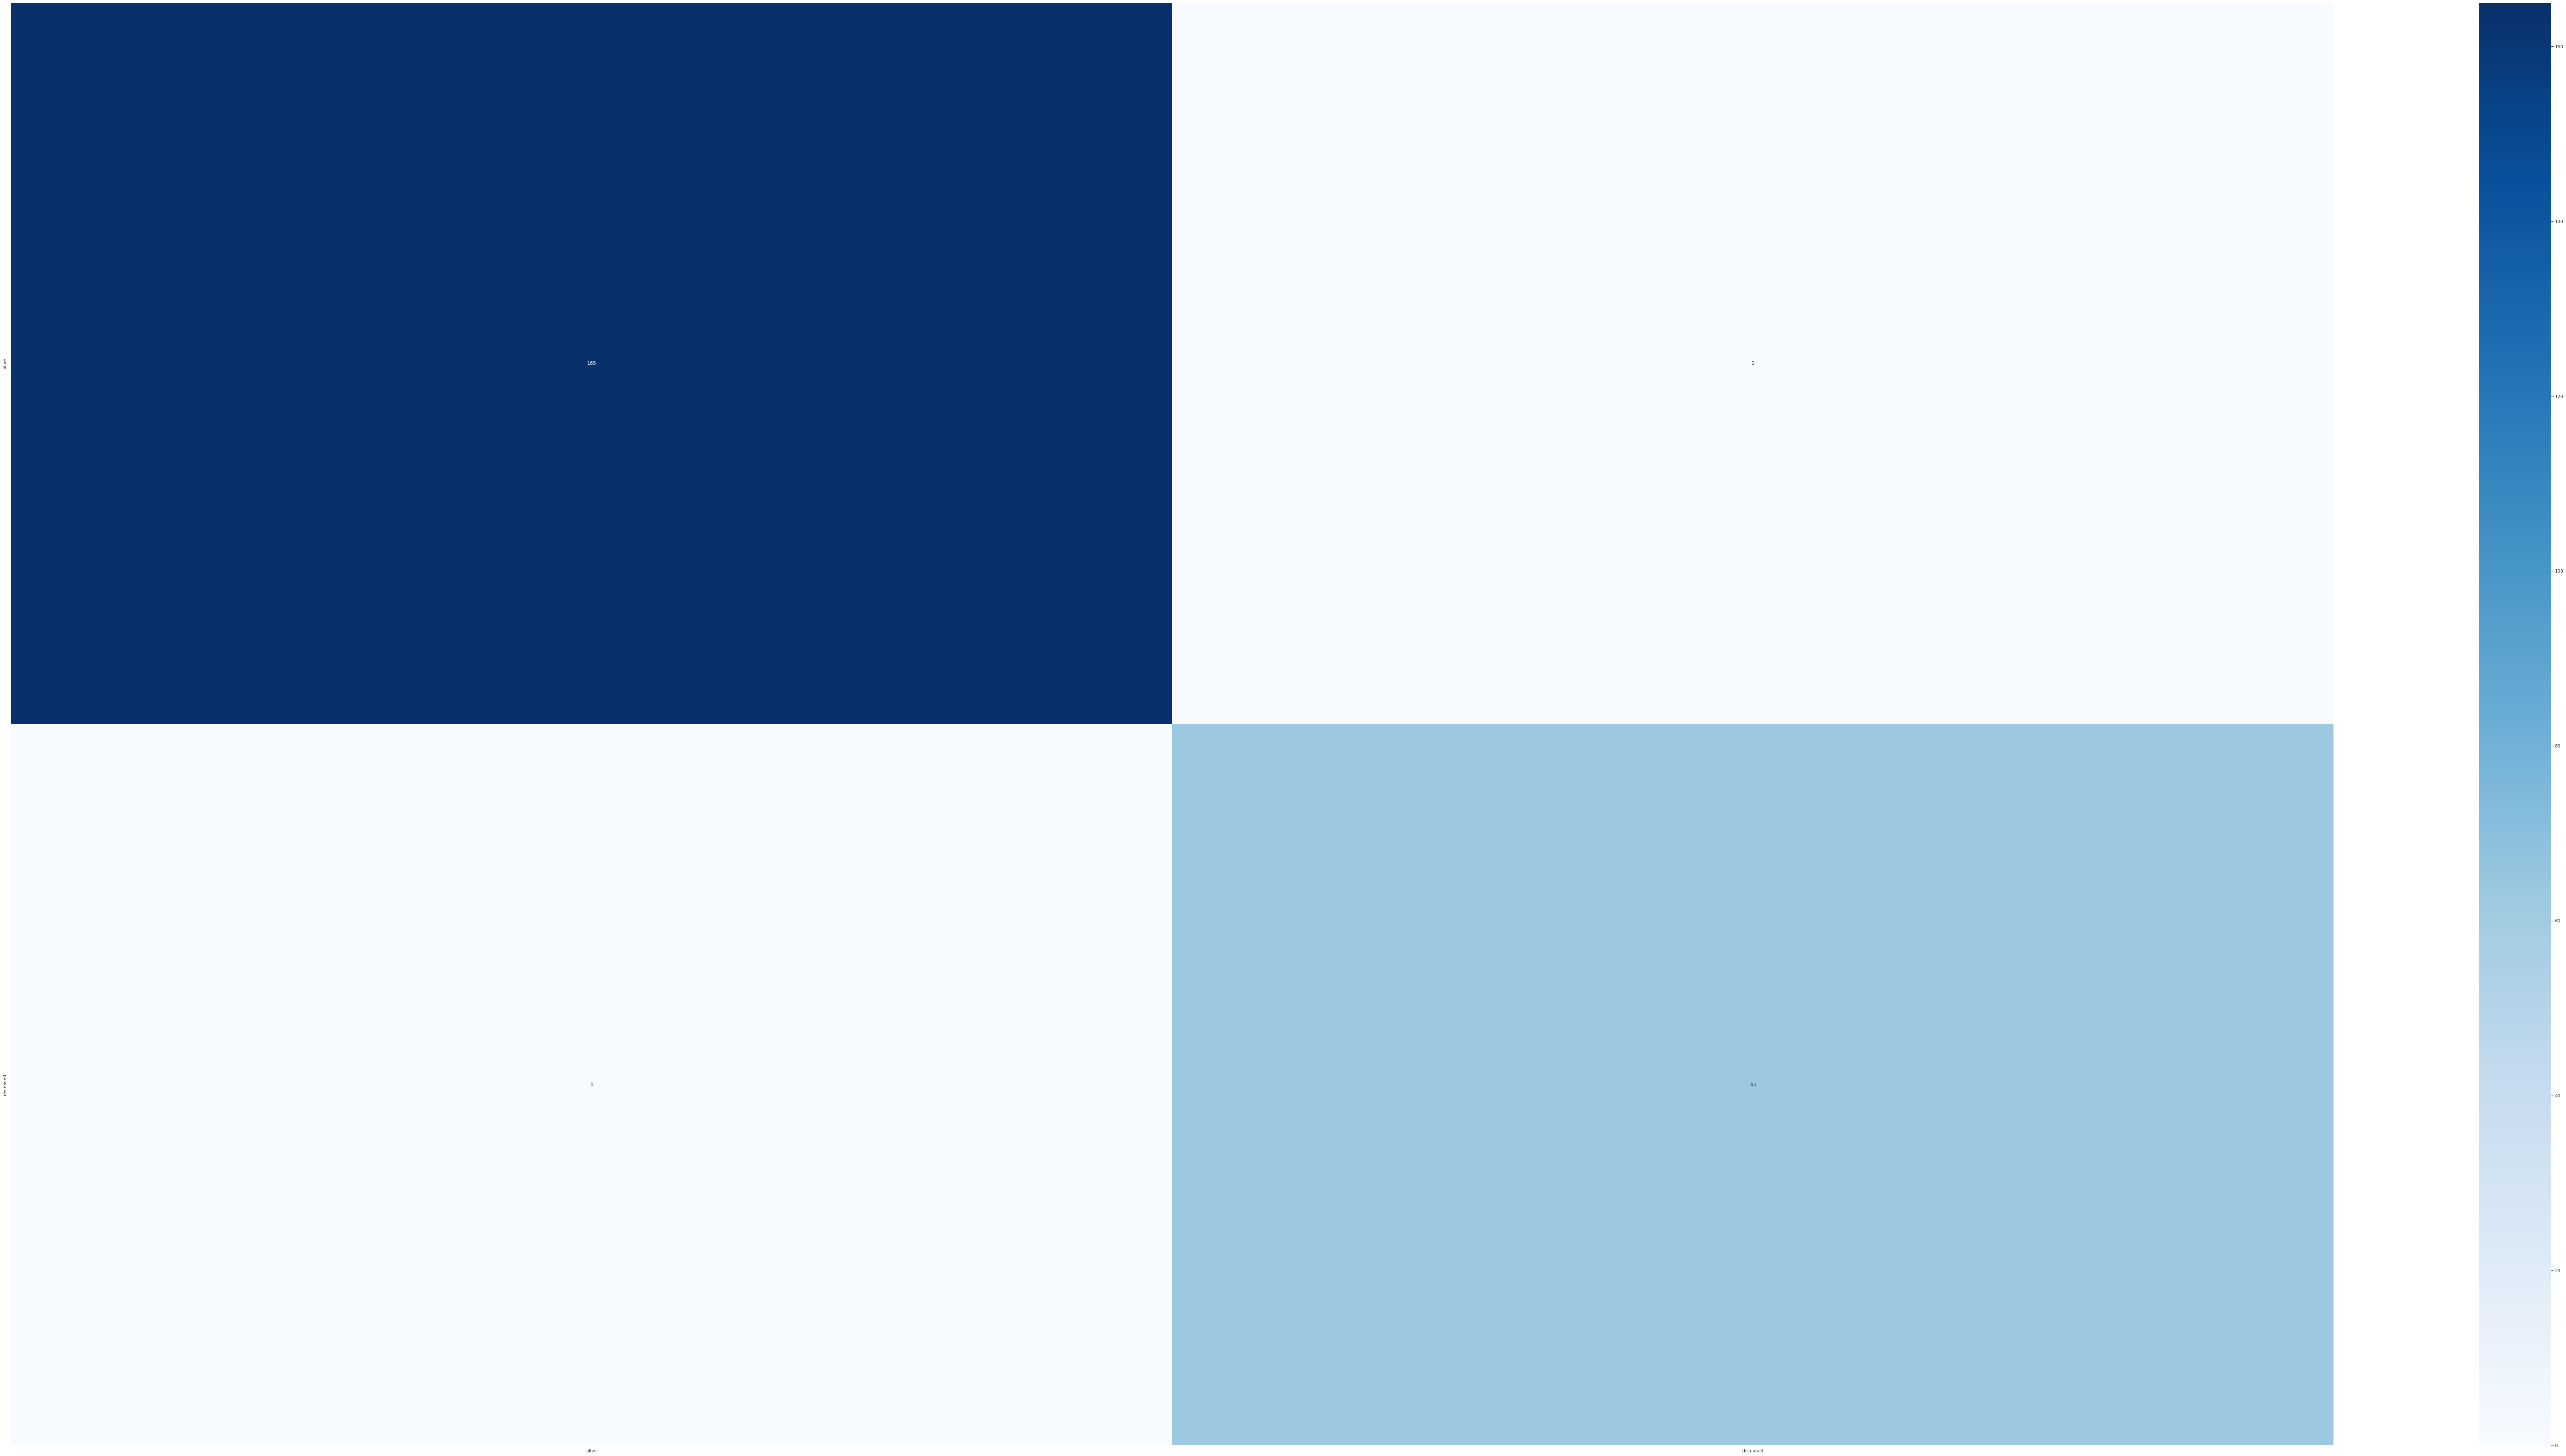

Test Confusion matrix


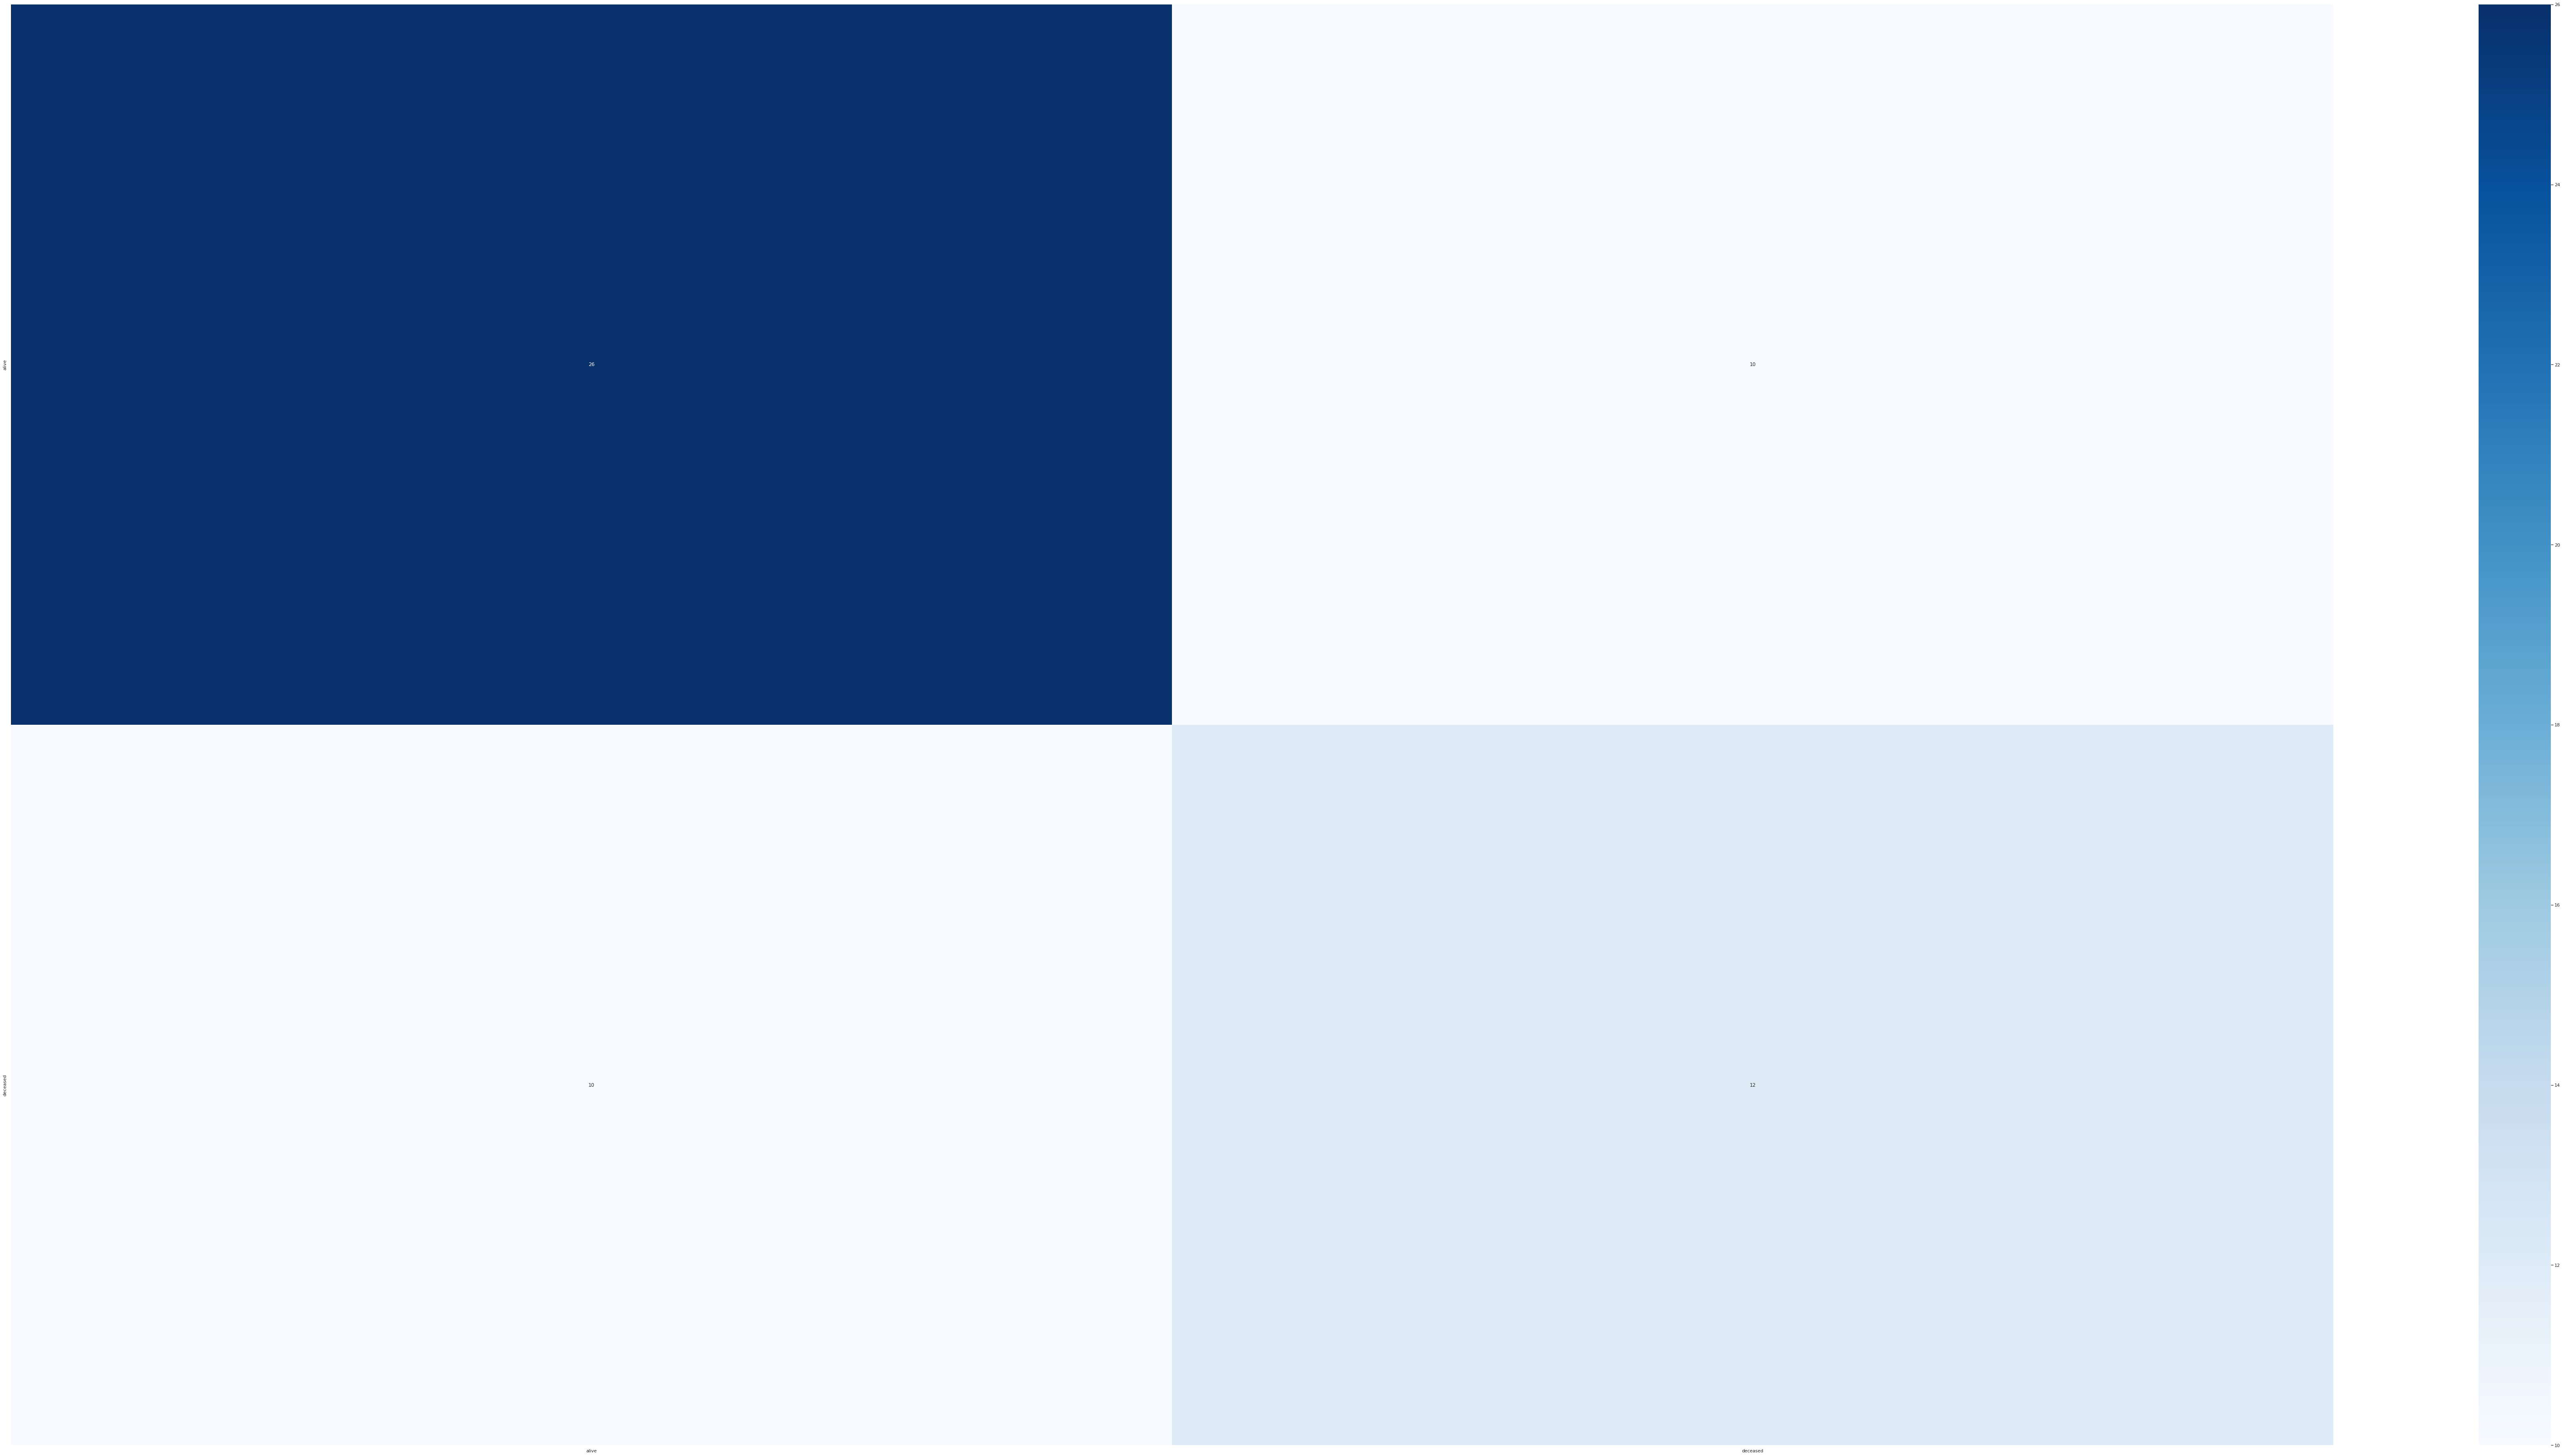

Train score 0.7675438596491229
Test score 0.7241379310344828
Train Confusion matrix


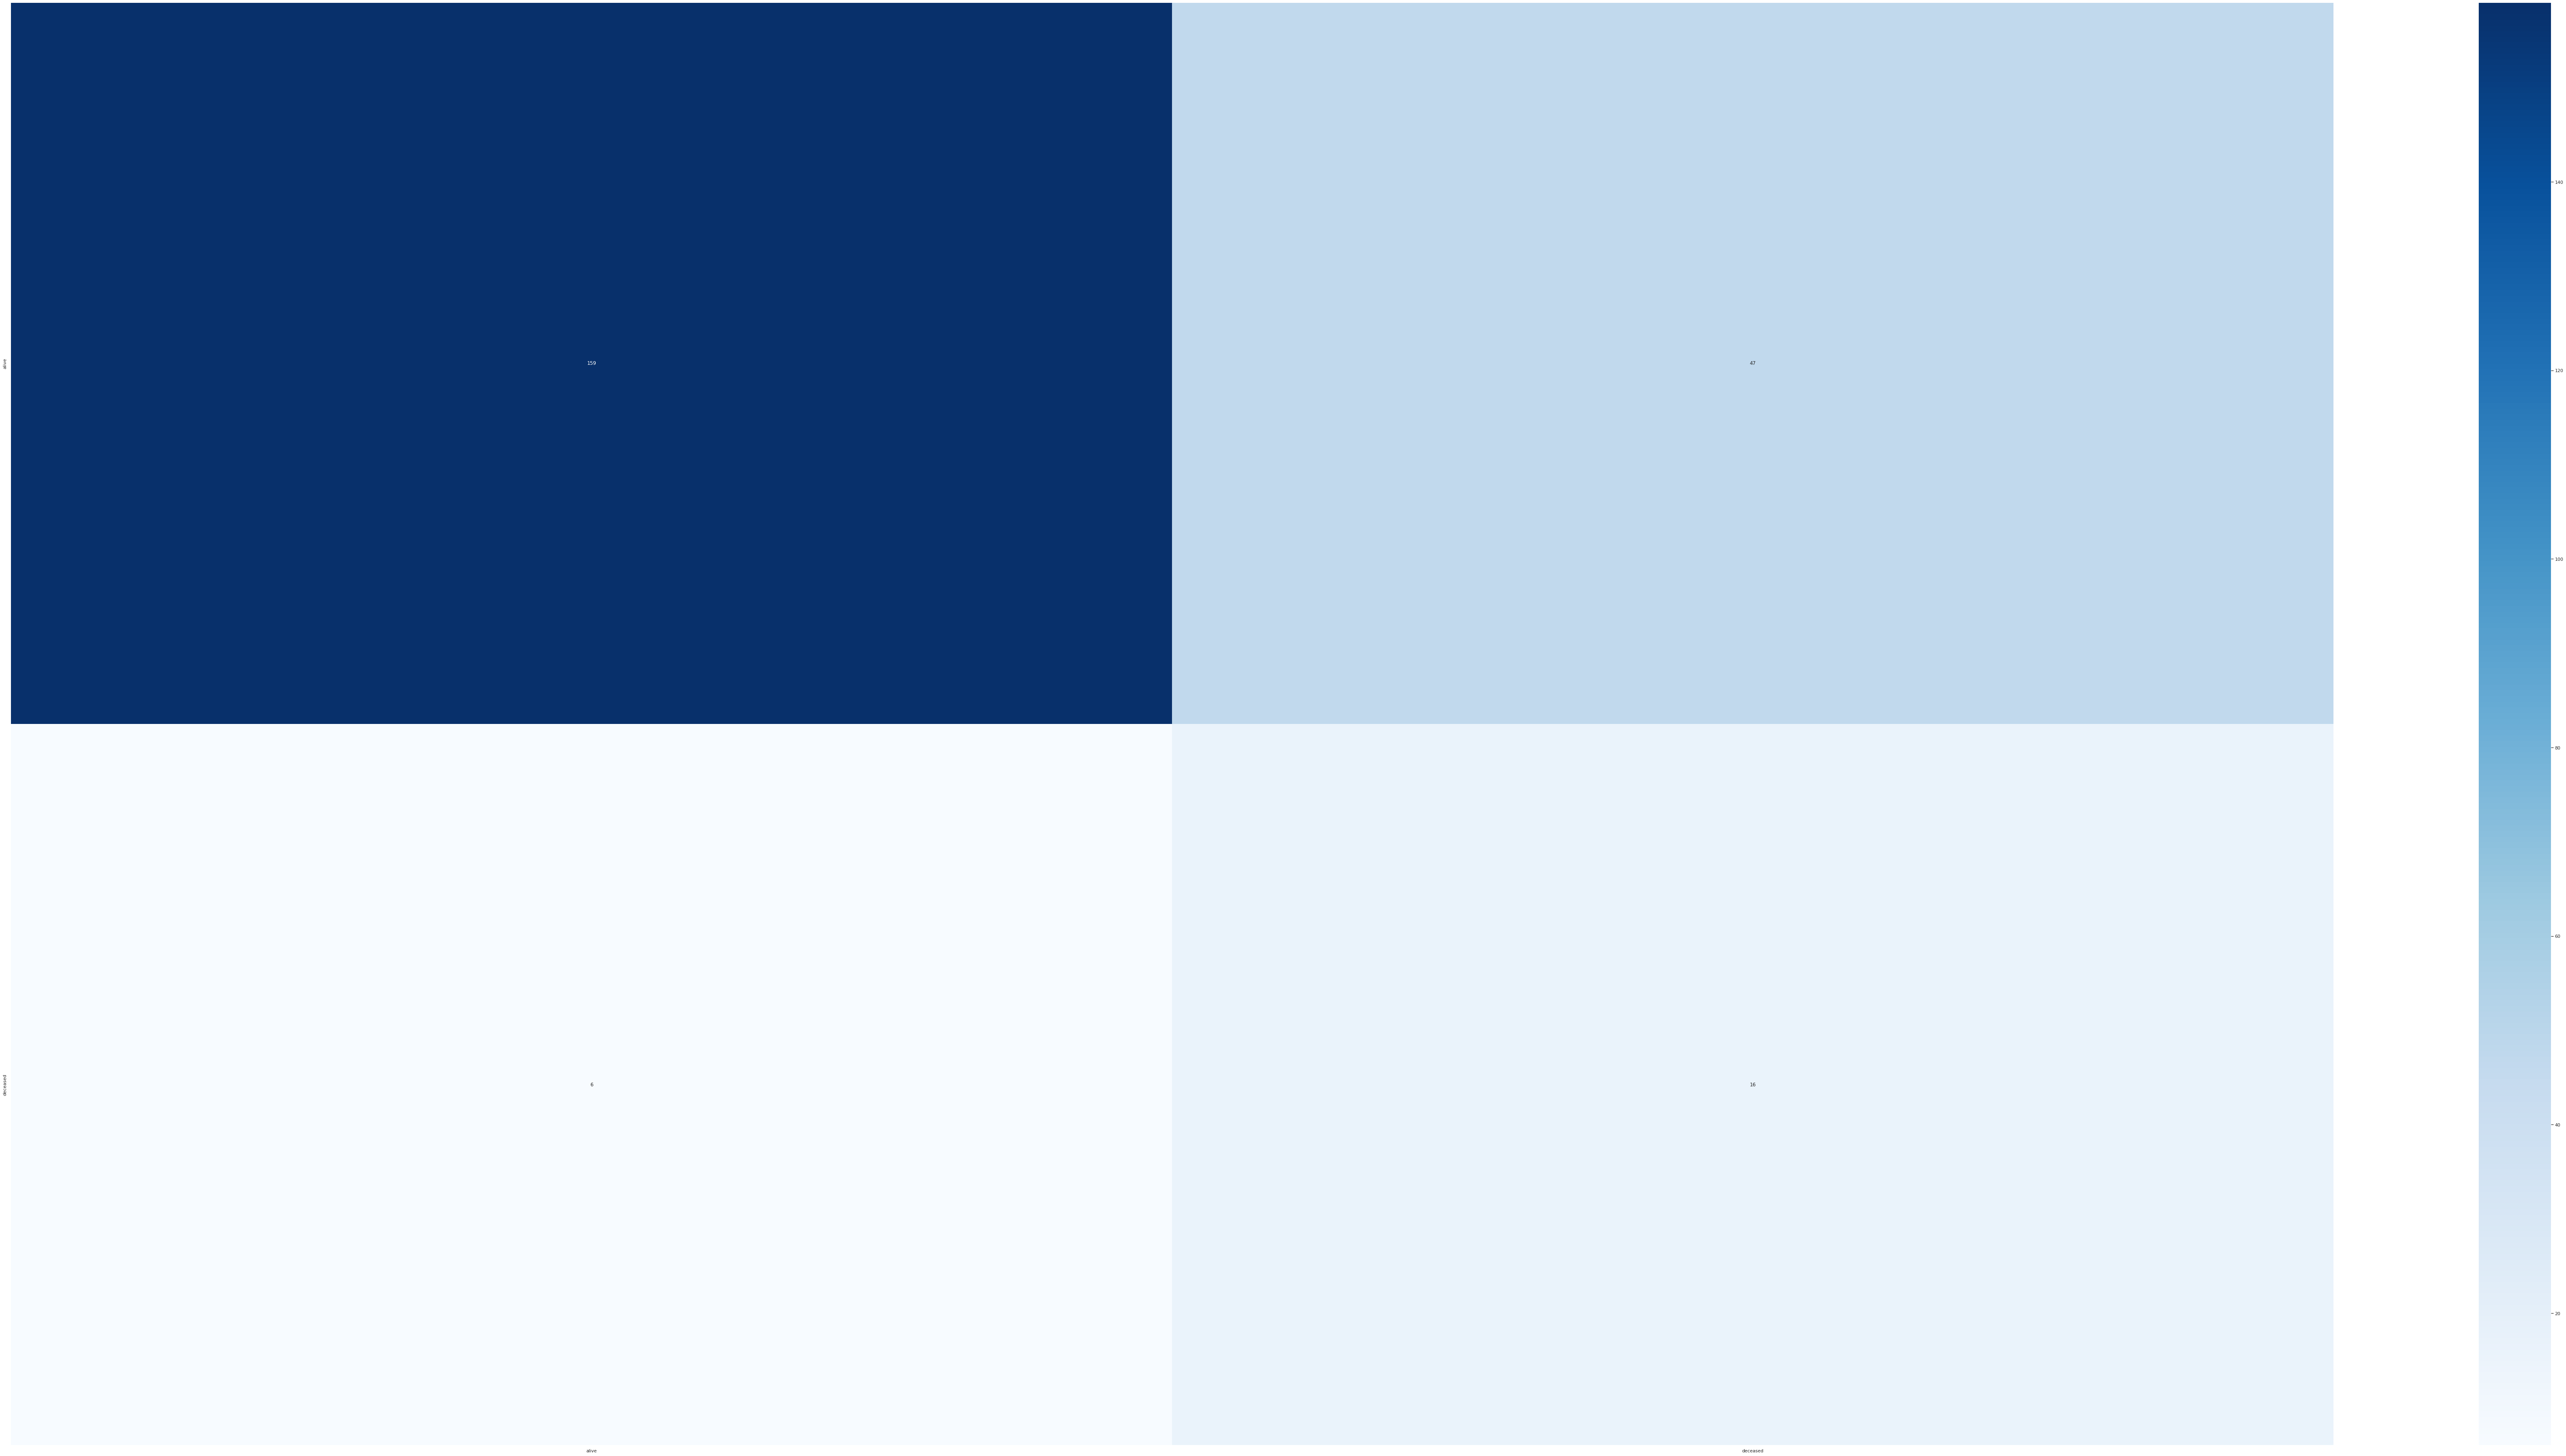

Test Confusion matrix


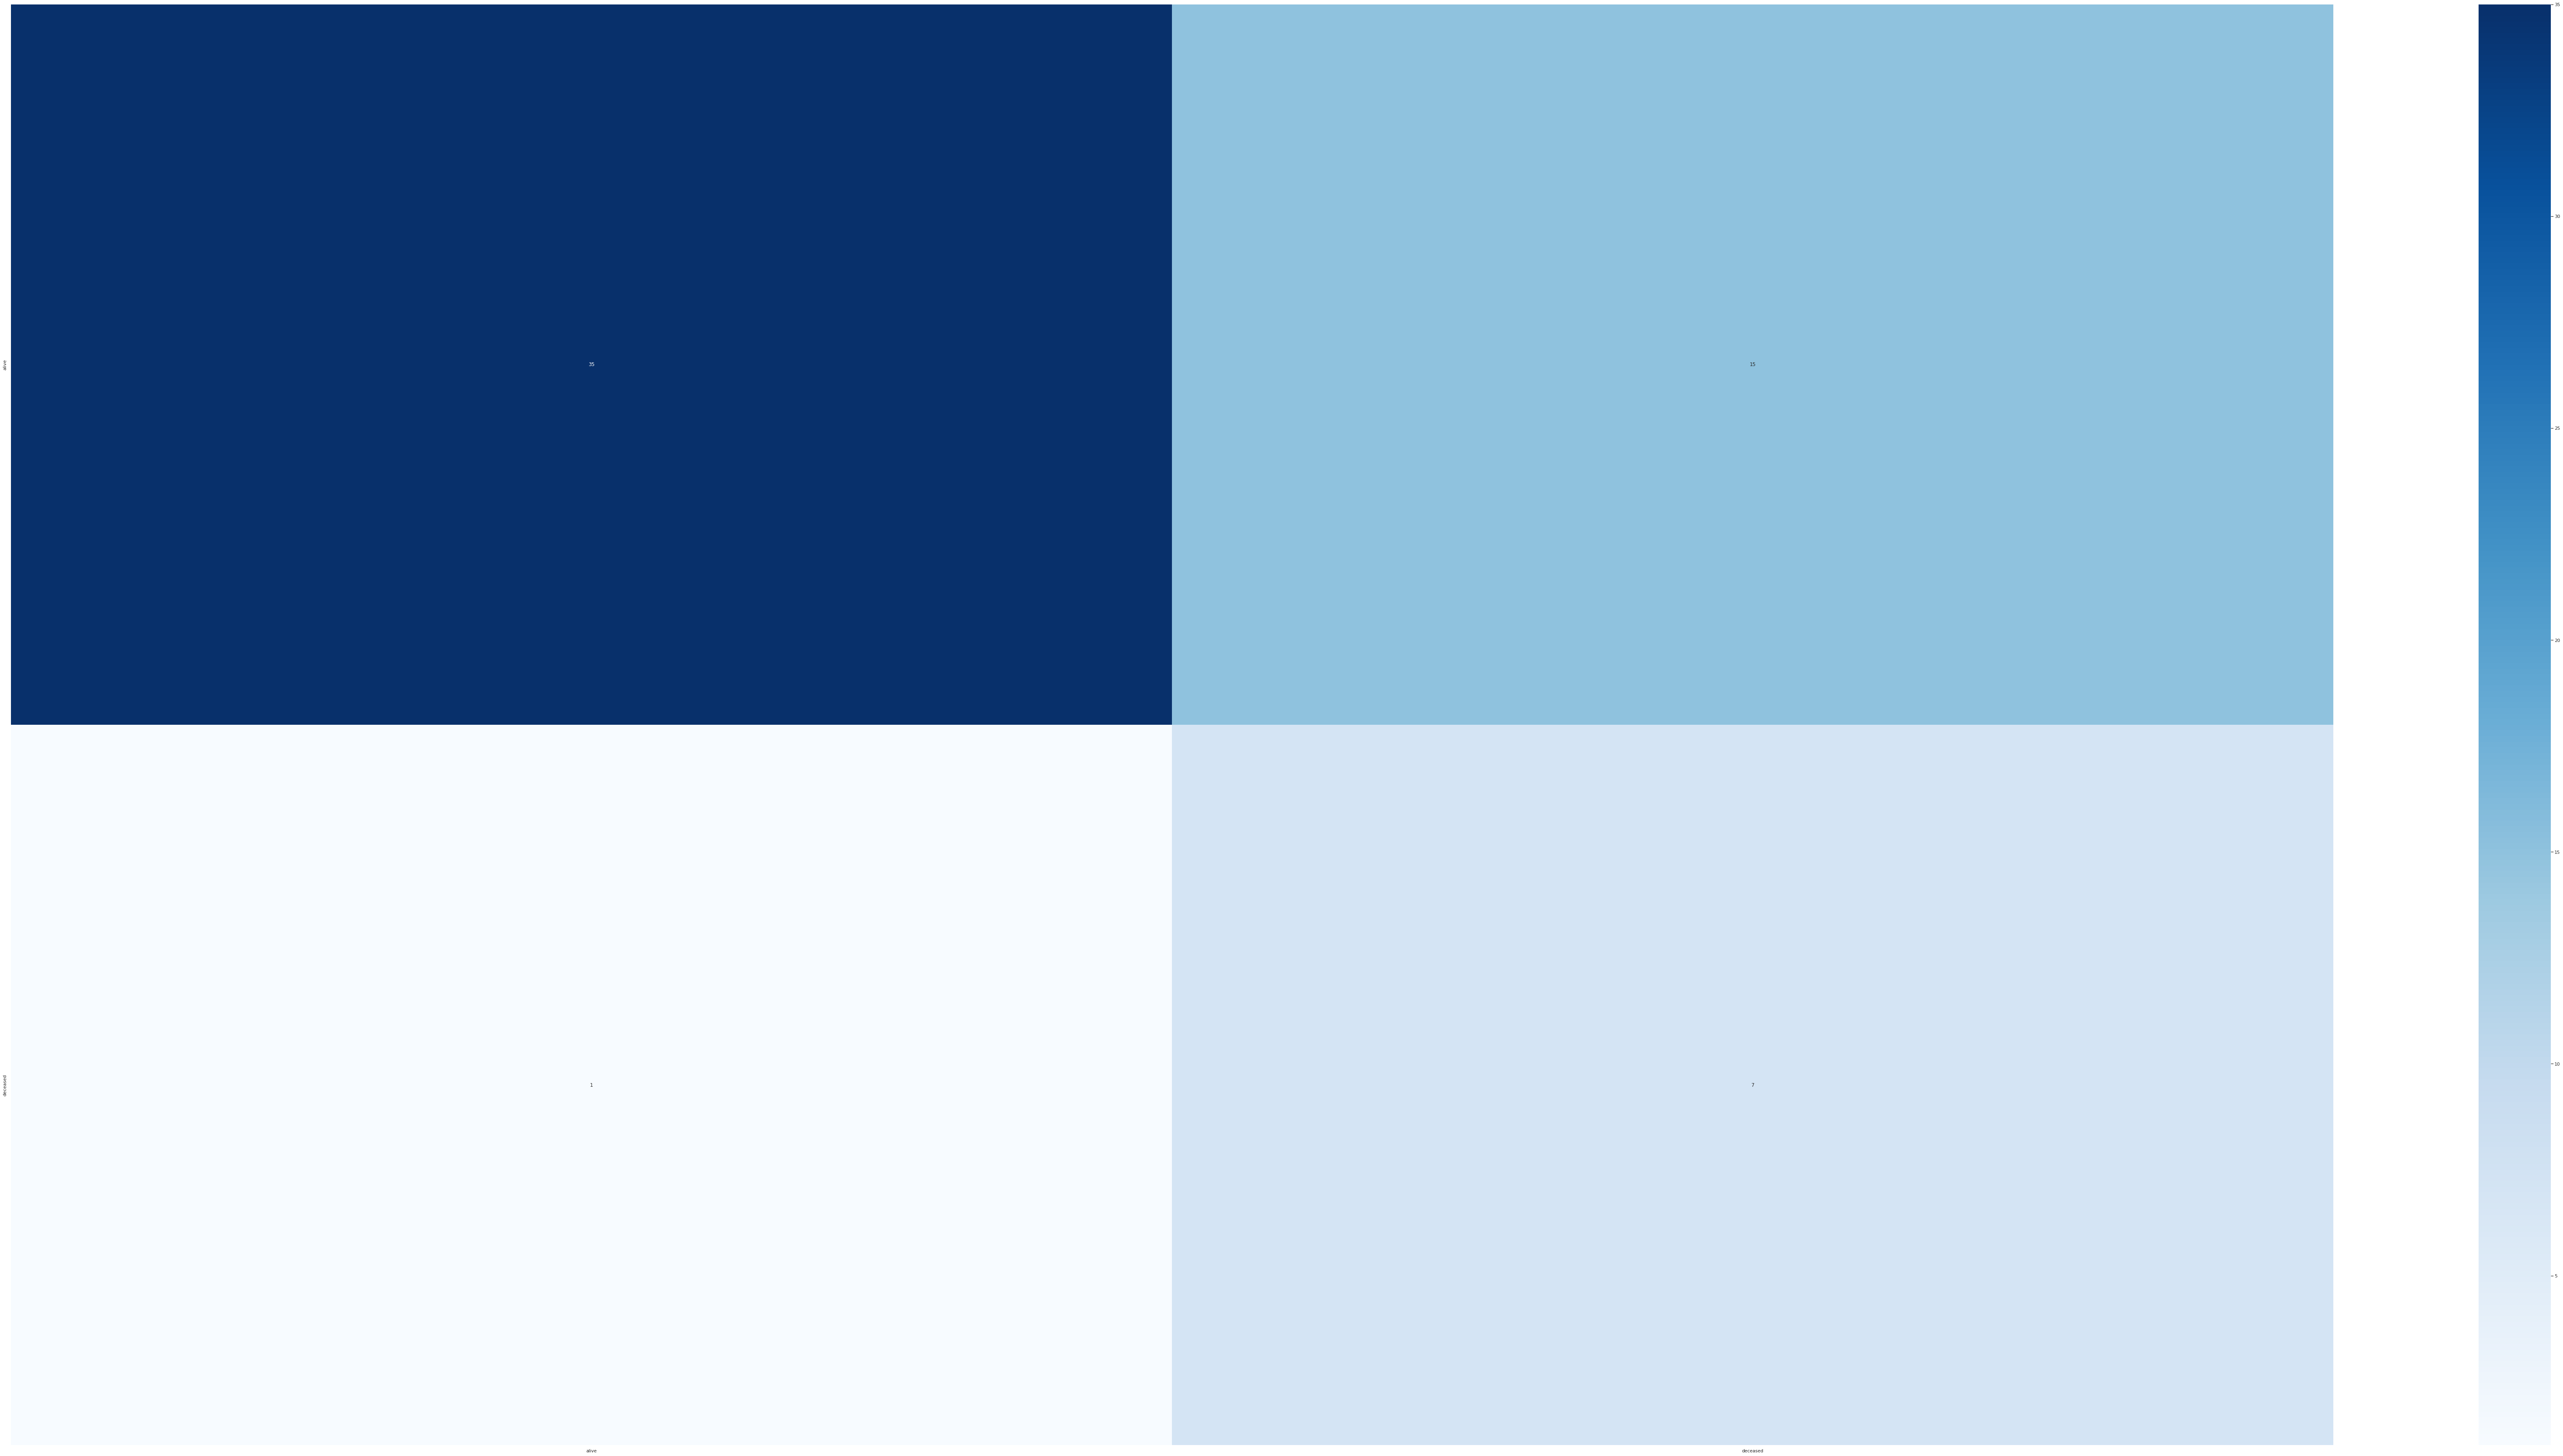

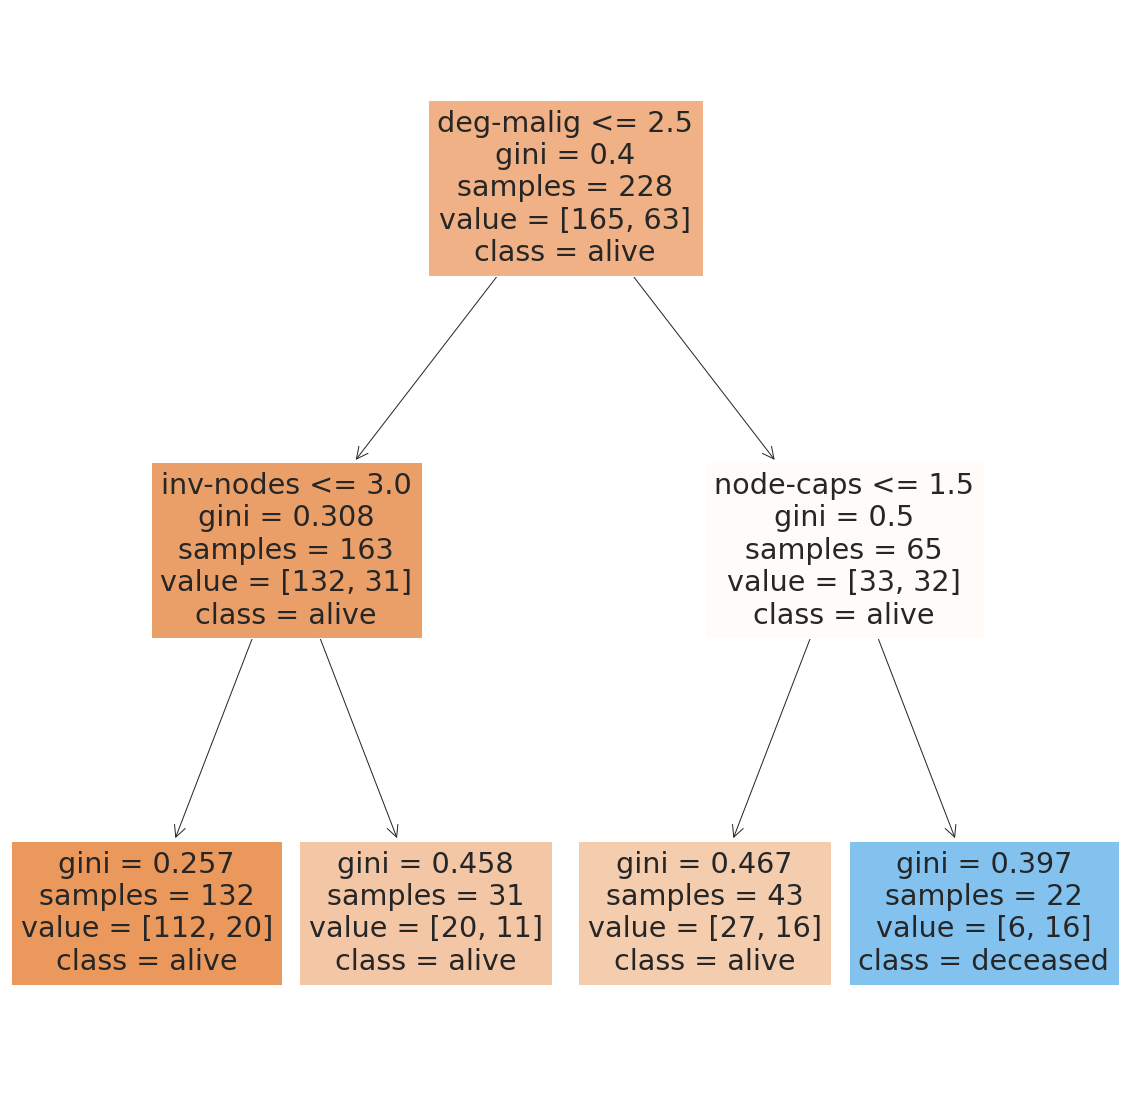

In [ ]:
#change plot size
plt.rcParams['figure.figsize'] = [100, 50]

#decision tree preparation for data 1
#separate the feature columns from the target column
features_tree = ['overweight','race','age','menopause','inv-nodes','node-caps','tumor-size','deg-malig','breast','breast-quad','irradiat']

X = np.array(BC.drop(['death'], 1))
y = np.array(BC['death'])

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)

#decision tree for data 1
#create the actual decision tree
dtree = DecisionTreeClassifier(random_state=0)
dtree = dtree.fit(X_train,y_train)

#tree.plot_tree(dtree, feature_names=features_tree)

y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)
y_train_pred

#without pruning
plt.figure(figsize=(20,20))
features = BC.columns
classes = ['alive','deceased']
tree.plot_tree(dtree,feature_names=features_tree,class_names=classes,filled=True)
plt.show()

# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

#pre
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)

#post
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

plt.figure(figsize=(20,20))
features = BC.columns
classes = ['alive','deceased']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()



In [ ]:
# Get the current processor
# time in seconds
pro_time = time.clock()
# print the current 
# processor time
print("Current processor time (in seconds):", pro_time)

Current processor time (in seconds): 25.800529


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


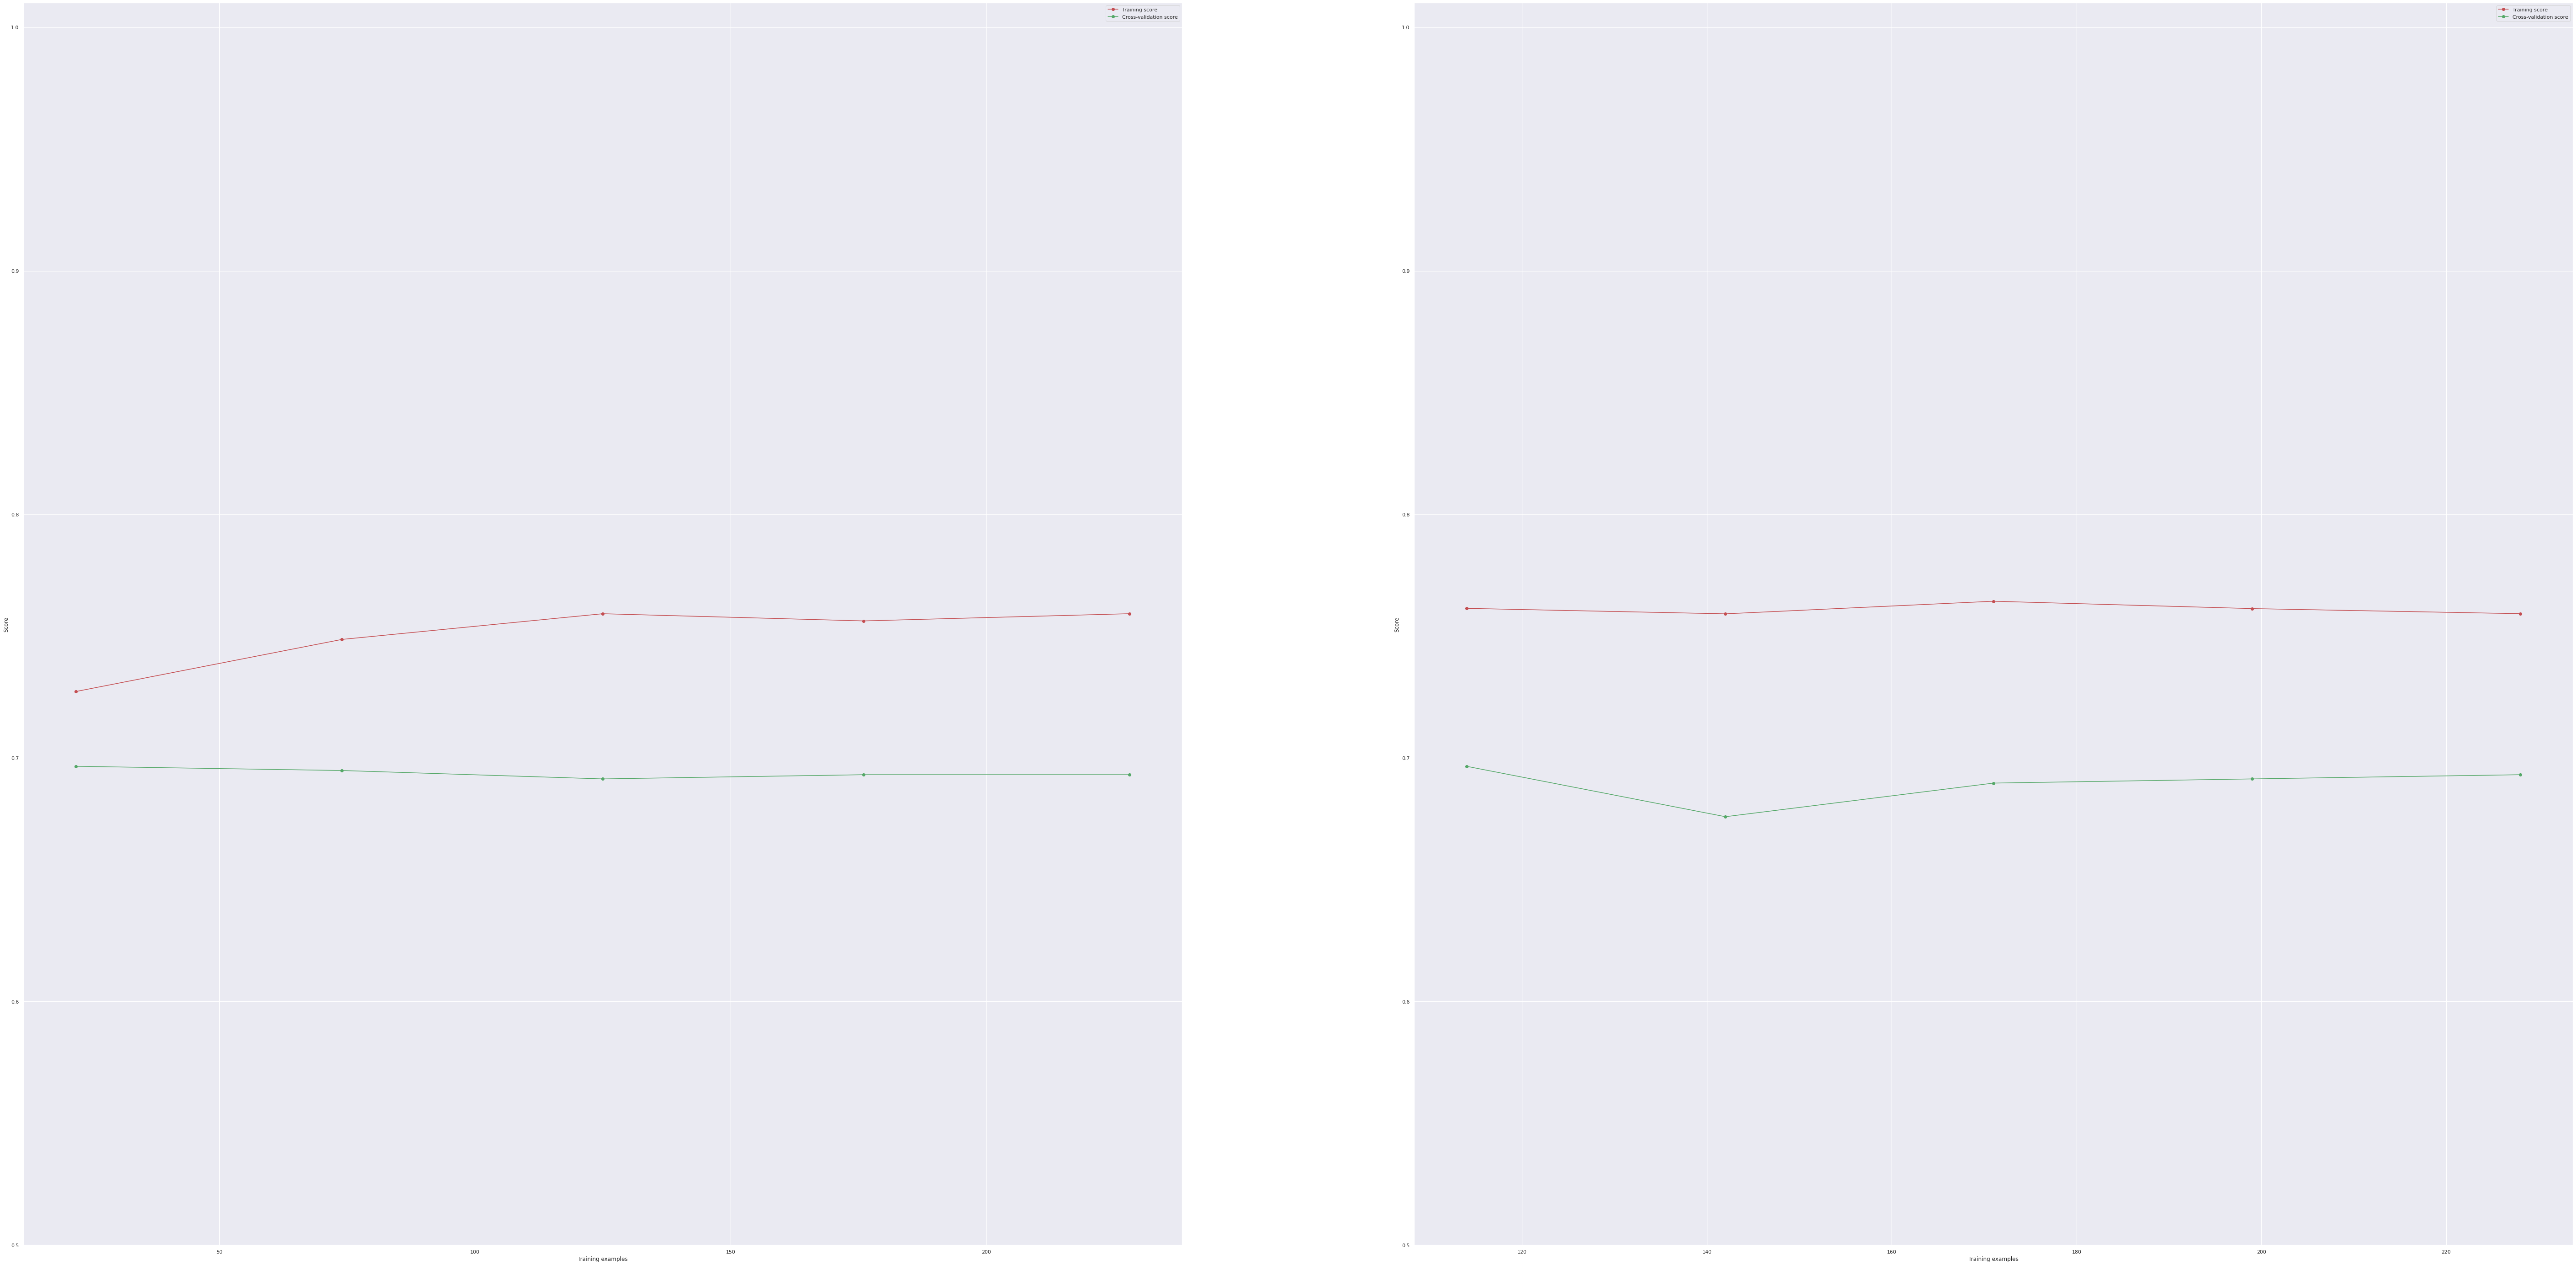

In [ ]:
def plot_learning_curve(estimator, X, y, ax=None, ylim=(0.5, 1.01), cv=None, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
              
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.legend(loc="best")
    return plt

fig, (ax1, ax2) = plt.subplots(1, 2)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC()
plot_learning_curve(estimator, X, y, ax = ax1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
plot_learning_curve(estimator, X, y, ax = ax2, cv=cv, train_sizes=np.linspace(.5, 1.0, 5))
plt.show()


Neural networks

In [ ]:
#data 2
X = np.array(BC.drop(['death'], 1))
y = np.array(BC['death'])

BC['death']

mean = X.mean(axis=0)
X = X - mean
std = X.std(axis=0)
X /= std

# create X and Y datasets for training
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

y_train.shape

# convert the data to categorical labels

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

X_train[0]

#data 2 use this
# define a function to build the keras model

def create_model():
    # create model
    model = Sequential()
    #change input_dim as needed
    model.add(Dense(16, input_dim=11, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))

    # compile model
    adam = Adam(lr=0.001)
    model.compile(optimizer='adam',loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

# fit the model to the training data
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


(228, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 346
Trainable params: 346
Non-trainable params: 0
________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


None
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


23/23 [==============================] - 3s 32ms/step - loss: 0.6923 - accuracy: 0.5482 - val_loss: 0.6810 - val_accuracy: 0.7069
Epoch 2/50
23/23 [==============================] - 0s 9ms/step - loss: 0.6778 - accuracy: 0.7018 - val_loss: 0.6703 - val_accuracy: 0.7069
Epoch 3/50
23/23 [==============================] - 0s 8ms/step - loss: 0.6651 - accuracy: 0.7018 - val_loss: 0.6582 - val_accuracy: 0.7069
Epoch 4/50
23/23 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.7018 - val_loss: 0.6472 - val_accuracy: 0.7069
Epoch 5/50
23/23 [==============================] - 0s 6ms/step - loss: 0.6377 - accuracy: 0.7061 - val_loss: 0.6327 - val_accuracy: 0.7069
Epoch 6/50
23/23 [==============================] - 0s 10ms/step - loss: 0.6200 - accuracy: 0.7193 - val_loss: 0.6197 - val_accuracy: 0.7069
Epoch 7/50
23/23 [==============================] - 0s 8ms/step - loss: 0.6138 - accuracy: 0.7105 - val_loss: 0.6075 - val_accuracy: 0.7069
Epoch 8/50
23/23 [===========

In [ ]:
# Get the current processor
# time in seconds
pro_time = time.clock()
# print the current 
# processor time
print("Current processor time (in seconds):", pro_time)

Current processor time (in seconds): 15.205273


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


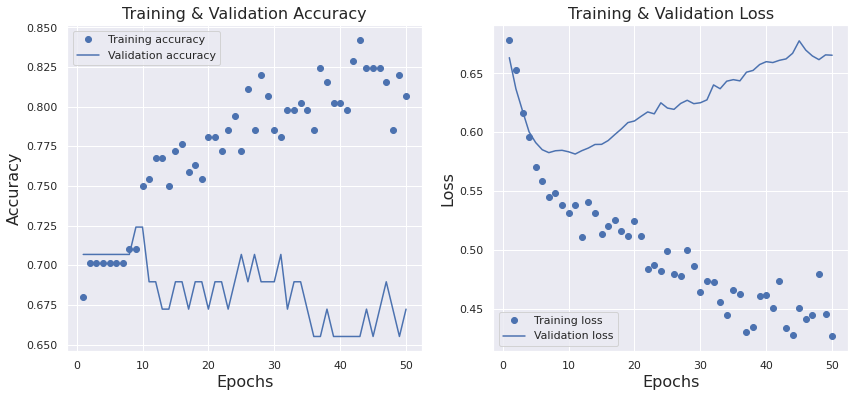

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

Boosting

[0]	validation_0-logloss:0.664453	validation_1-logloss:0.666928
[1]	validation_0-logloss:0.639872	validation_1-logloss:0.648665
[2]	validation_0-logloss:0.619295	validation_1-logloss:0.631961
[3]	validation_0-logloss:0.601271	validation_1-logloss:0.609456
[4]	validation_0-logloss:0.585883	validation_1-logloss:0.596815
[5]	validation_0-logloss:0.572114	validation_1-logloss:0.580472
[6]	validation_0-logloss:0.560413	validation_1-logloss:0.566735
[7]	validation_0-logloss:0.549538	validation_1-logloss:0.559983
[8]	validation_0-logloss:0.541057	validation_1-logloss:0.549003
[9]	validation_0-logloss:0.532232	validation_1-logloss:0.542429
[10]	validation_0-logloss:0.525424	validation_1-logloss:0.534388
[11]	validation_0-logloss:0.518773	validation_1-logloss:0.530523
[12]	validation_0-logloss:0.512627	validation_1-logloss:0.524228
[13]	validation_0-logloss:0.50655	validation_1-logloss:0.520506
[14]	validation_0-logloss:0.501707	validation_1-logloss:0.518097
[15]	validation_0-logloss:0.497984	v

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


[27]	validation_0-logloss:0.462454	validation_1-logloss:0.510636
[28]	validation_0-logloss:0.460721	validation_1-logloss:0.512092
[29]	validation_0-logloss:0.457278	validation_1-logloss:0.513878
[30]	validation_0-logloss:0.455735	validation_1-logloss:0.51542
[31]	validation_0-logloss:0.452436	validation_1-logloss:0.514574
[32]	validation_0-logloss:0.450412	validation_1-logloss:0.515548
[33]	validation_0-logloss:0.448654	validation_1-logloss:0.517245
[34]	validation_0-logloss:0.44677	validation_1-logloss:0.519317
[35]	validation_0-logloss:0.443505	validation_1-logloss:0.524109
[36]	validation_0-logloss:0.440731	validation_1-logloss:0.525379
[37]	validation_0-logloss:0.439435	validation_1-logloss:0.527025
[38]	validation_0-logloss:0.437005	validation_1-logloss:0.527867
[39]	validation_0-logloss:0.435438	validation_1-logloss:0.529933
[40]	validation_0-logloss:0.434258	validation_1-logloss:0.530578
[41]	validation_0-logloss:0.432109	validation_1-logloss:0.530508
[42]	validation_0-logloss:0

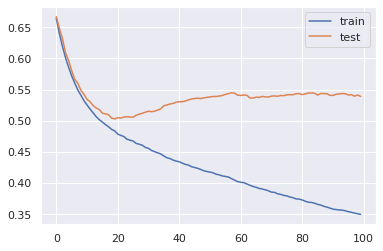

In [ ]:
#data 2
X = np.array(BC.drop(['death'], 1))
y = np.array(BC['death'])

#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# define the model
model = XGBClassifier()
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
# Get the current processor
# time in seconds
pro_time = time.clock()
# print the current 
# processor time
print("Current processor time (in seconds):", pro_time)

Current processor time (in seconds): 4.935501


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
'''
#fit model on training data using GradientBoosting
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

print(model)

#make predictions for test data
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

#make predictions for test data
y_pred = model_XGB.predict(X_test)
predictions = [round(value) for value in y_pred]

#evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accurara: %.2f%%" % (accuracy * 100.0))
'''

GradientBoostingClassifier()
Accurara: 80.00%


Support Vector Machines

In [ ]:
#data 2
X = np.array(BC.drop(['death'], 1))
y = np.array(BC['death'])

#separate data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

#use kernal linear
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

y_pred_linear = svclassifier.predict(X_test)

#print(confusion_matrix(y_test,y_pred_linear))
print(classification_report(y_test,y_pred_linear))

#use kernal polynomial
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

y_pred_poly = svclassifier.predict(X_test) 

#print(confusion_matrix(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


              precision    recall  f1-score   support

           0       0.77      0.90      0.83        40
           1       0.64      0.39      0.48        18

    accuracy                           0.74        58
   macro avg       0.70      0.64      0.66        58
weighted avg       0.73      0.74      0.72        58

              precision    recall  f1-score   support

           0       0.81      0.72      0.76        40
           1       0.50      0.61      0.55        18

    accuracy                           0.69        58
   macro avg       0.65      0.67      0.66        58
weighted avg       0.71      0.69      0.70        58



In [ ]:
 # Get the current processor
# time in seconds
pro_time = time.clock()
# print the current 
# processor time
print("Current processor time (in seconds):", pro_time)

Current processor time (in seconds): 7.823657


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:94: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


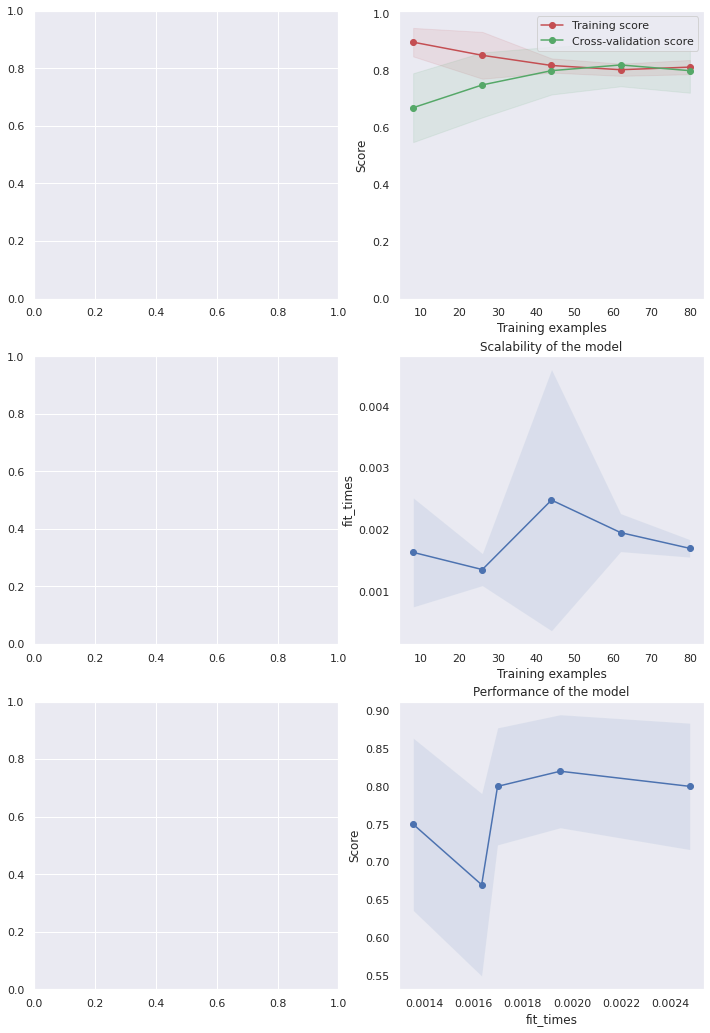

In [ ]:
def plot_learning_curve(
    estimator,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

fig, axes = plt.subplots(3, 2, figsize=(12, 18))
X = np.array(BC.drop(['death'], 1))
y = np.array(BC['death'])


cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(
    estimator, X, y, axes=axes[:, 1], ylim=(0, 1.01), cv=cv, n_jobs=4
)

plt.show()

K-nearest Neighbour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


[0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1]


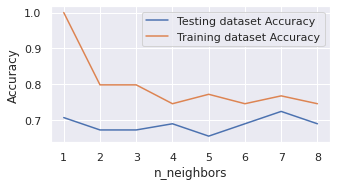

array([1.        , 0.79824561, 0.79824561, 0.74561404, 0.77192982,
       0.74561404, 0.76754386, 0.74561404])

In [ ]:
#data 2
X = np.array(BC.drop(['death'], 1))
y = np.array(BC['death'])

#separating training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on dataset which model has not seen before
print(knn.predict(X_test))

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

#change plot size
plt.rcParams['figure.figsize'] = [5, 2.5]

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.plot(figsize=(12, 18))

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

test_accuracy
train_accuracy
# k = 6 or 7 shows the best estimate

In [ ]:
 # Get the current processor
# time in seconds
pro_time = time.clock()
# print the current 
# processor time
print("Current processor time (in seconds):", pro_time)

Current processor time (in seconds): 7.099554


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
